#### _______________________________ AI-POWERED FRAUD DETECTION SYSTEM____________________________________

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:/Users/Nikhil Sukthe/Downloads/train_hsbc_df.csv")

### DATA ANALYSIS - involves inspecting, cleaning, transforming, and modeling data to discover useful information, make PRE UNDERSTANDNIG 

In [3]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C583110837','3','M','28007','M480139044','28007','es_health',44.26,1
1,0,'C1332295774','3','M','28007','M480139044','28007','es_health',324.50,1
2,0,'C1160421902','3','M','28007','M857378720','28007','es_hotelservices',176.32,1
3,0,'C966214713','3','M','28007','M857378720','28007','es_hotelservices',337.41,1
4,0,'C1450140987','4','F','28007','M1198415165','28007','es_wellnessandbeauty',220.11,1


In [4]:
df.tail()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
513638,179,'C748358246','2','M','28007','M1823072687','28007','es_transportation',51.17,0
513639,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
513640,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
513641,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
513642,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


### check for missing values in a DataFrame using Pandas:

In [5]:
df.isnull()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
513638,False,False,False,False,False,False,False,False,False,False
513639,False,False,False,False,False,False,False,False,False,False
513640,False,False,False,False,False,False,False,False,False,False
513641,False,False,False,False,False,False,False,False,False,False


### CLASIFYING DATA TYPES FOR STRUCTRUAL INFORMATION 

In [6]:
df.dtypes

step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object

### observation - As The Data set is larger .. We Cannot find Maximum Accuracy with Random forest,, other classsifers we should implement the XGBoot classifer and Bayesian Optimization for the Higher Accuracy Perfect training of Machine Learning Model -- !!

In [7]:
print(len(df))

513643


### GRAPHICAL -UNDERSTANDING USING PYTHON FUNCTIONALITYS 

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

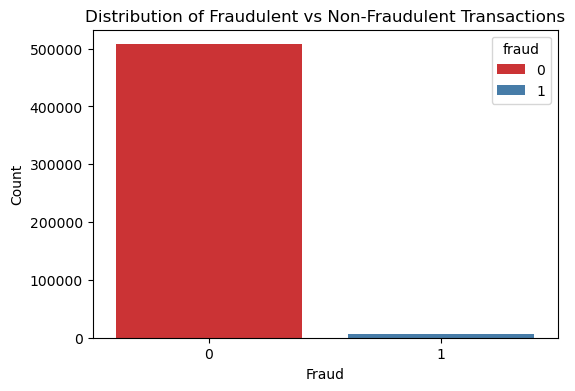

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='fraud', data=df, hue='fraud', palette='Set1', dodge=False)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

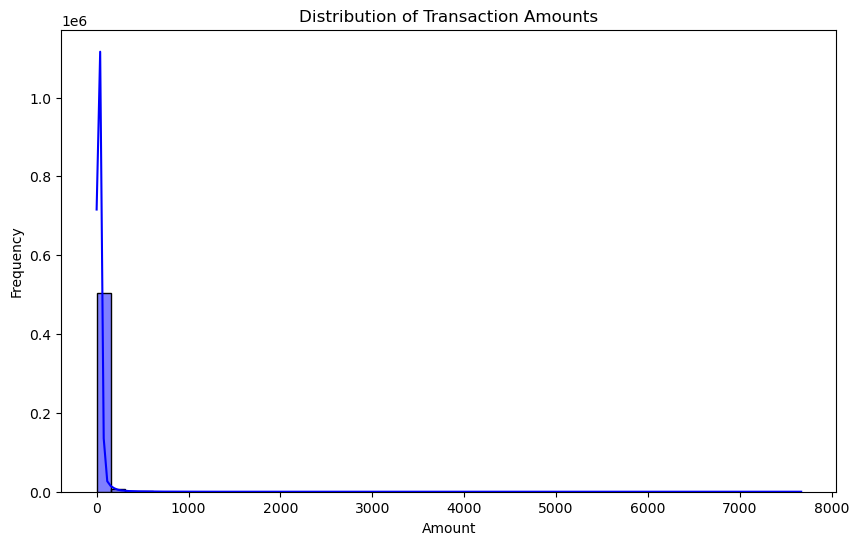

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

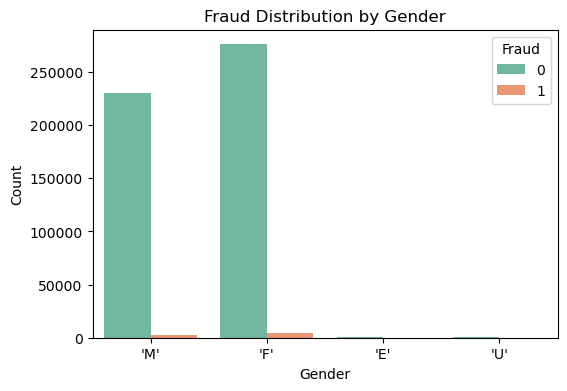

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='fraud', data=df, palette='Set2')
plt.title('Fraud Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Fraud')
plt.show()

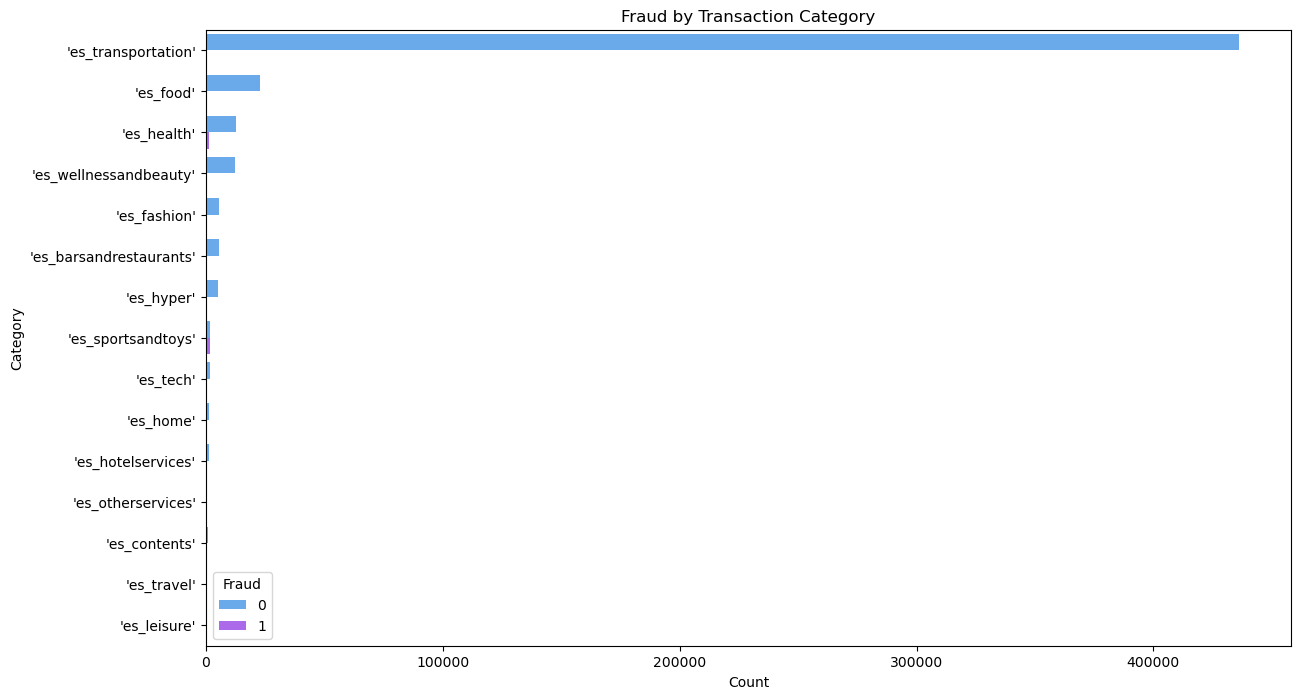

In [13]:
plt.figure(figsize=(14, 8))
sns.countplot(y='category', hue='fraud', data=df, order=df['category'].value_counts().index, palette='cool')
plt.title('Fraud by Transaction Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.legend(title='Fraud')
plt.show()

In [14]:
df['TID'] = df.get('TID', df.index)

### CATEGORICAL DATA --CONVERSION-- NUMERICAL DATA

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

#### Converting Categorical Data into Numerical Data 
#### It Is an essential preprocessing step in machine learning and data analysis. Categorical data, which includes variables that represent categories or labels, often needs to be transformed into a numerical format to be used effectively by machine learning algorithms.

In [17]:
categorical_features = ['customer', 'age', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant', 'category']
df[categorical_features] = df[categorical_features].apply(lambda col: LabelEncoder().fit_transform(col.astype(str)))

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [20]:
df['amount_log'] = np.log1p(df['amount'])
df['hour'] = pd.to_datetime(df['step'], unit='h').dt.hour


X = df.drop(columns=['fraud', 'TID'])
y = df['fraud']


X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [21]:
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization
from sklearn.pipeline import Pipeline

### PIPELINE  FOR efficiency for training of the model accurate prediction 

In [22]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

### Bayesian Optimization

In [23]:
param_dist = {
    'classifier__max_depth': range(3, 9),
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__n_estimators': range(100, 501, 100),
    'classifier__min_child_weight': [1, 3, 5],
    'classifier__subsample': [0.7, 0.8, 0.9],
    'classifier__colsample_bytree': [0.7, 0.8, 0.9],
    'classifier__gamma': [0, 0.1, 0.2]
}

In [25]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

### mathematical explanation - about configurized model 

#### " n_tier = 50 "   ," CV = 3 " IMPORTANT ASPECT FOR SECURING THE MAXIMUM ACCURACY 

#### MORE NUMBER OF ITERATION MAKES - HIGHER ACCURACY SCORE IN EACH ASPECT THAT IS THE REASON OF USING XGBOOT WITH BAYESIAN OPTIMIZATION 

In [26]:
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=50, cv=3, random_state=42, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\Nikhil Sukthe\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:47:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('classifier',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric='logloss',
                                                            feature_types=None,
                                                            gamma=None,
                                                            grow_policy=None,...
                                                            random_state=None, ...))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'classifier__colsample_bytree': [0.7,
                                                                         0.8,
                                                                         0.9],
                                        'classifier__gamma': [0, 0.1, 0.2],
                                        'classifier__learning_rate': [0.01,
                                                                      0.05,
                                                                      0.1],
                                        'classifier__max_depth': range(3, 9),
                                        'classifier__min_child_weight': [1, 3,
                                                                         5],
                                        'classifier__n_estimators': range(100, 501, 100),
                                        'classifier__subsample': [0.7, 0.8,
                                                                  0.9]},
                   random_state=42, verbose=2)

In [27]:
best_model = random_search.best_estimator_

In [28]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.50).astype(int) 

In [30]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_fscore_support, confusion_matrix

In [31]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

### Precision= 
TP+FP
/TP
   ### ​Recall= 
TP+FN
/TP
 ###  ​F1 Score=2⋅ 
Precision+Recall
/Precision⋅Recall


In [32]:
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 0.9954
Recall: 0.9986
F1 Score: 0.9970
AUC-ROC: 0.9999
Accuracy: 0.9970


 ## confusion_matrix Accuracy= 
TP+FP+TN+FN
/TP+TN
​


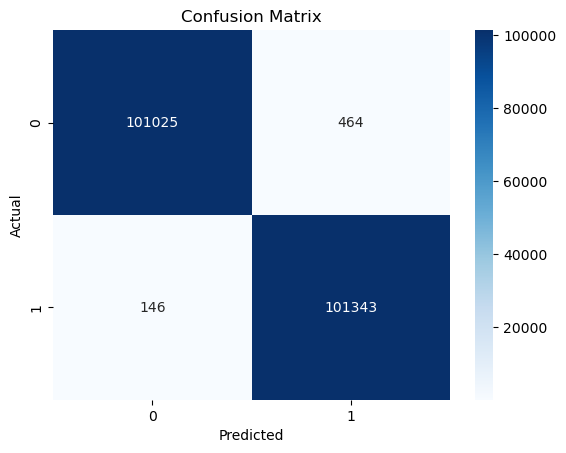

In [33]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


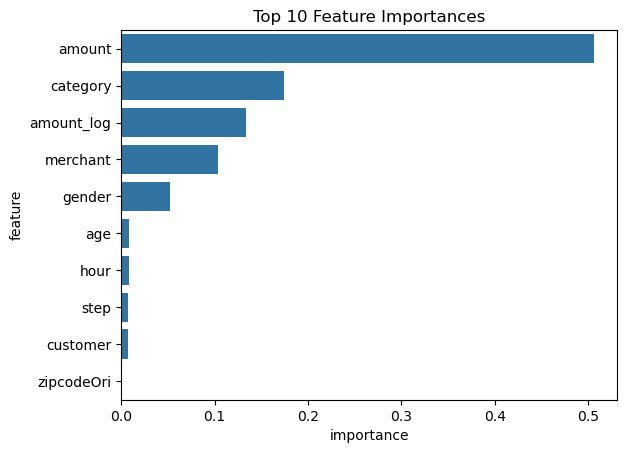

In [34]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.named_steps['classifier'].feature_importances_
}).sort_values('importance', ascending=False).head(10)

sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Top 10 Feature Importances')
plt.show()

#### ONCE AGAIN CHECK WHEATHER WE HAVE MISSIED ANY DATA SO , OUR ACCURACY DOESN'T MISS .. 

In [40]:
missing_indices = set(X_test.index) - set(df.index)
if missing_indices:
    print(f"Missing indices: {missing_indices}")
else:
    print("All indices are present.")


Missing indices: {524289, 524290, 524293, 786440, 786443, 524300, 524305, 786449, 524307, 524308, 524310, 524313, 786458, 786460, 524317, 524320, 786466, 524325, 786470, 786471, 524330, 524331, 524343, 524344, 524345, 524346, 524347, 524348, 524350, 524354, 524355, 786501, 524359, 524361, 524364, 524365, 524371, 524372, 786515, 524374, 786523, 786526, 524384, 786531, 524394, 524395, 524396, 786539, 786540, 786542, 524400, 786545, 524404, 786550, 524408, 524409, 786552, 524411, 786553, 524415, 524416, 786563, 786564, 524421, 786566, 786569, 524430, 524431, 786576, 524435, 524438, 786584, 786591, 524448, 786594, 786602, 524459, 524461, 786606, 524463, 786610, 524468, 786612, 786617, 524474, 786618, 786621, 524482, 524486, 524487, 524491, 786637, 524494, 786639, 786641, 786644, 524501, 524503, 524504, 786648, 524507, 524514, 786658, 786662, 524522, 524523, 786667, 524527, 786673, 786675, 524532, 524533, 786677, 786680, 524540, 524541, 786685, 786684, 786687, 786688, 786691, 524553, 524554

In [41]:
print(df.columns)


Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud', 'TID', 'amount_log',
       'hour'],
      dtype='object')


In [43]:
print(type(X_test.index))
print(type(df.index))


<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [45]:
print(df.columns)  # Check if 'customer' exists in df
print(df.head())   # Check the first few rows of df
print(X_test.index)  # Check the index of X_test


Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud', 'TID', 'amount_log',
       'hour'],
      dtype='object')
   step  customer  age  gender  zipcodeOri  merchant  zipMerchant  category  \
0     0      3219    3       2           0        34            0         4   
1     0       723    3       2           0        34            0         4   
2     0       362    3       2           0        44            0         6   
3     0      4040    3       2           0        44            0         6   
4     0       969    4       1           0         2            0        14   

   amount  fraud  TID  amount_log  hour  
0   44.26      1    0    3.812424     0  
1  324.50      1    1    5.785362     0  
2  176.32      1    2    5.177956     0  
3  337.41      1    3    5.824258     0  
4  220.11      1    4    5.398660     0  
Index([549833, 544950, 611023, 103221, 696363, 938537, 472496, 877961, 864076,
       51243

In [46]:
df = df.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)


In [47]:

print(all(idx in df.index for idx in X_test.index))  # Should be True


True


In [49]:

try:
    customer_values = df.loc[X_test.index, 'customer'].values
except KeyError as e:
    print(f"KeyError: {e}")
    # Output missing indices or columns for debugging
    missing_indices = set(X_test.index) - set(df.index)
    missing_columns = [col for col in ['customer'] if col not in df.columns]
    print(f"Missing indices: {missing_indices}")
    print(f"Missing columns: {missing_columns}")
    # Handle the issue accordingly
    raise


predictions_df = pd.DataFrame({
    'customer': customer_values,
    'probability': y_pred_proba,
    'target': y_pred
})


predictions_df.to_csv('submission.csv', index=False)


## SUBMISSION FILE ANALYSIS ## 

In [51]:
sum=pd.read_csv("C:/Users/Nikhil Sukthe/submission.csv")

### SUBMISSION FILE CLEARLY EXPLAINS ABOUT THE TARGET - (FRUAD/NOT) , AND WITH CUSTOMER ID 

In [52]:
sum.head()

,customer,probability,target
0,3219,0.998637,1
1,723,0.999376,1
2,362,0.999681,1
3,4040,0.000070,0
4,969,0.999453,1


In [63]:
import pandas as pd
sub = pd.read_csv("C:/Users/Nikhil Sukthe/submission.csv")


fraudulent_count = sub[sub['target'] == 1].shape[0]

print(f"Number of fraudulent transactions detected: {fraudulent_count}")

Number of fraudulent transactions detected: 101807


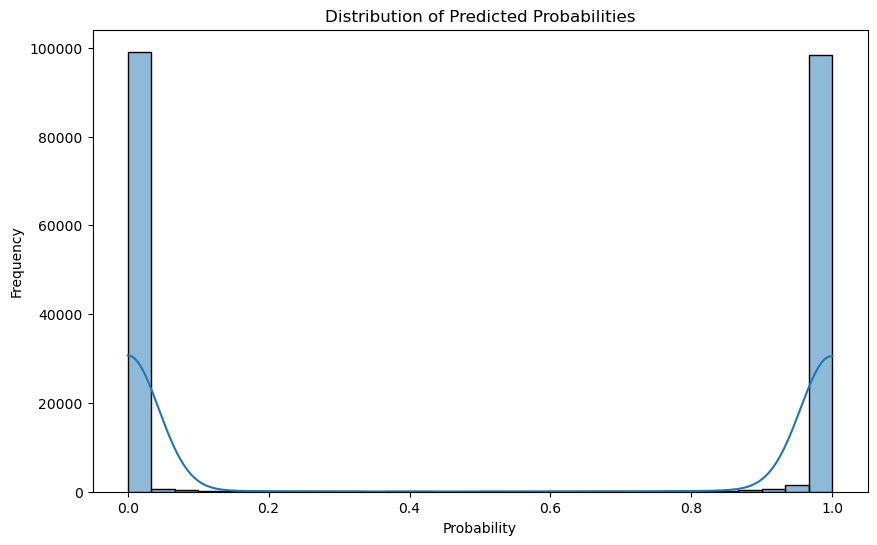

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of probabilities
plt.figure(figsize=(10, 6))
sns.histplot(predictions_df['probability'], bins=30, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

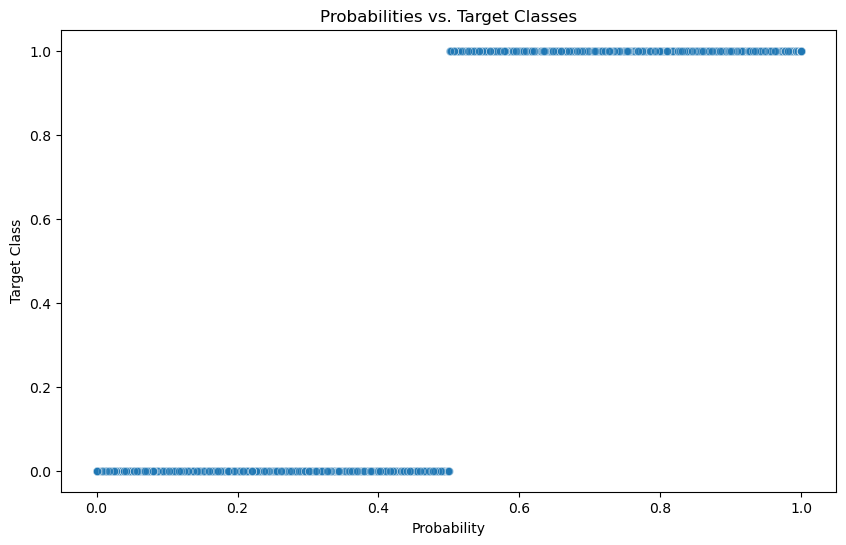

In [58]:
# Scatter plot of probabilities vs. target
plt.figure(figsize=(10, 6))
sns.scatterplot(x='probability', y='target', data=predictions_df, alpha=0.5)
plt.title('Probabilities vs. Target Classes')
plt.xlabel('Probability')
plt.ylabel('Target Class')
plt.show()


### conclusion :  

## Precision: 0.9954
## Recall: 0.9986
## F1 Score: 0.9970
## AUC-ROC: 0.9999
## Accuracy: 0.9970